In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedShuffleSplit,cross_val_score
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
train = pd.read_csv('C:/Users/7fno/Desktop/Titanic classification/train.csv')
test = pd.read_csv('C:/Users/7fno/Desktop/Titanic classification/test.csv')
data = pd.concat([train,test])
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/7fno/Desktop/Titanic classification/train.csv'

In [ ]:
train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
#  SibSp is Number of Siblings/Spouses Abroad
#  parch is Number of Parents/Children Aboard
print(train.describe())
train.drop_duplicates()
test.drop_duplicates()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
print (f'Data shape is {train.shape}')
data.drop('PassengerId',axis = 1,inplace= True)
print (f'Data shape is {train.shape}')

Data shape is (891, 12)
Data shape is (891, 12)


In [ ]:
df = train.groupby('Sex')['Survived'].mean()
df

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

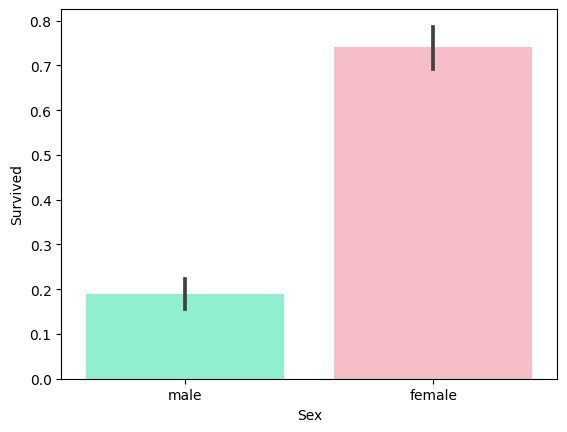

In [ ]:
pal = {'female':'lightpink' , 'male' : 'aquamarine'}
sns.barplot(data= train ,x = 'Sex',y = 'Survived',order = ['male','female'],palette= pal)

In [ ]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [ ]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [ ]:
temp_df = pd.pivot_table(temp,values='PassengerId', index = 'Pclass',columns = 'Survived')
temp_df

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
train['Name'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Name'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

train['Name']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
pd.crosstab(index = train['Name'], columns = train['Sex'])

Sex,female,male
Name,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
train['Title'] = train['Name'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],'Rare').str.replace('Master','Mr').str.replace('Mrs','Miss')
test['Title'] = test['Name'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],'Rare').str.replace('Master','Mr').str.replace('Mrs','Miss')

In [ ]:
test['Title'].unique()

array(['Mr', 'Miss', 'Rare'], dtype=object)

In [368]:
# we will drop cabin because the nuns is very high 
train.drop(['Name','Cabin','PassengerId'],axis = 1 ,inplace = True)
test.drop(['Name','Cabin'],axis = 1 ,inplace = True)

In [369]:
train['Family_size'] = train['SibSp']+train['Parch']+1
test['Family_size'] = test['SibSp']+test['Parch']+1
train.drop(['SibSp','Parch'],axis = 1 ,inplace = True)
test.drop(['SibSp','Parch'],axis = 1 ,inplace = True)

In [370]:
train['Alone'] = 0 
test['Alone'] = 0 
train.loc[train['Family_size']==1 , 'Alone'] = 1
test.loc[test['Family_size']==1 , 'Alone'] = 1


In [371]:
train['Alone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Alone, Length: 891, dtype: int64

In [372]:
train.drop('Family_size',axis = 1, inplace = True)
test.drop('Family_size',axis = 1, inplace = True)
train

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Alone
0,0,3,male,22.0,A/5 21171,7.2500,S,Mr,0
1,1,1,female,38.0,PC 17599,71.2833,C,Miss,0
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,Miss,1
3,1,1,female,35.0,113803,53.1000,S,Miss,0
4,0,3,male,35.0,373450,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,211536,13.0000,S,Rare,1
887,1,1,female,19.0,112053,30.0000,S,Miss,1
888,0,3,female,NaN,W./C. 6607,23.4500,S,Miss,0
889,1,1,male,26.0,111369,30.0000,C,Mr,1


In [373]:
train['cat_Ticket'] = train['Ticket'].str[0:2]
pd.crosstab(index = train['cat_Ticket'],columns=train['Survived'])
# we will drop the feature of Ticket and cat_ticket

Survived,0,1
cat_Ticket,,
11,38,50
12,2,2
13,3,8
14,1,3
16,2,8
17,3,10
19,5,11
20,0,1
21,4,0


In [374]:
train.drop(['Ticket','cat_Ticket'],axis = 1 , inplace=True)
test.drop(['Ticket'],axis = 1 , inplace=True)
train.isna().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
Fare        0.000000
Embarked    0.002245
Title       0.000000
Alone       0.000000
dtype: float64

## Feature Engineering 

In [375]:
test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.205742
Fare           0.002392
Embarked       0.000000
Title          0.000000
Alone          0.000000
dtype: float64

In [376]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [377]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= .30 ,random_state= 0)
print(X_train.shape)
print(X_test.shape)

(623, 7)
(268, 7)


feature engineering to y 

In [378]:
X_train.isna().mean()


Pclass      0.000000
Sex         0.000000
Age         0.194222
Fare        0.000000
Embarked    0.003210
Title       0.000000
Alone       0.000000
dtype: float64

In [379]:
X_train.isna().mean()

Pclass      0.000000
Sex         0.000000
Age         0.194222
Fare        0.000000
Embarked    0.003210
Title       0.000000
Alone       0.000000
dtype: float64

feature engineering to age

In [380]:
# we will fill nans 
def remove_nans(df,variable,mean_median):
    return df[variable].fillna(mean_median)

In [381]:
mean = X_train['Age'].mean()
median = X_train['Age'].median()


In [382]:
X_train['Mean_Age'] = remove_nans(X_train,'Age',mean)
X_train['Mean_Age'].isna().mean()
test = remove_nans(test,'Age',mean)

In [383]:
X_train['Median_Age']= remove_nans(X_train,'Age',median)
X_train['Median_Age'].isna().mean()

0.0

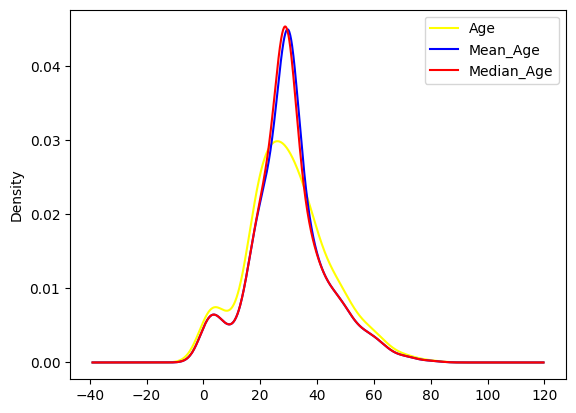

In [384]:
fig = plt.figure()
ax= plt.subplot()
X_train['Age'].plot(kind= 'kde',ax = ax,color = 'yellow' )
X_train['Mean_Age'].plot(kind= 'kde',ax = ax , color = 'blue')
X_train['Median_Age'].plot(kind= 'kde',ax = ax , color = 'red')
lines , labels =  ax.get_legend_handles_labels()
ax.legend(lines,labels)

In [385]:
print(X_train['Age'].var())
print(X_train['Mean_Age'].var())
print(X_train['Median_Age'].var())

210.4528692463678
169.51268085599725
169.64401397346103


In [386]:
X_train.drop(['Mean_Age','Median_Age'],axis = 1,inplace=True)

we will fill Nans with random sample

In [387]:
X_train['Age_random'] = X_train['Age'].copy()
X_test['Age_random'] = X_test['Age'].copy()
random_sample_train = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum(), random_state = 0)
random_sample_test = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum(),random_state = 0)
random_sample_train.index = X_train[X_train['Age'].isnull()].index
random_sample_test.index = X_test[X_test['Age'].isnull()].index
X_train.loc[X_train['Age'].isnull(), 'Age_random'] = random_sample_train #الكود ده مهم 
X_test.loc [X_test['Age'].isnull(),'Age_random'] = random_sample_test

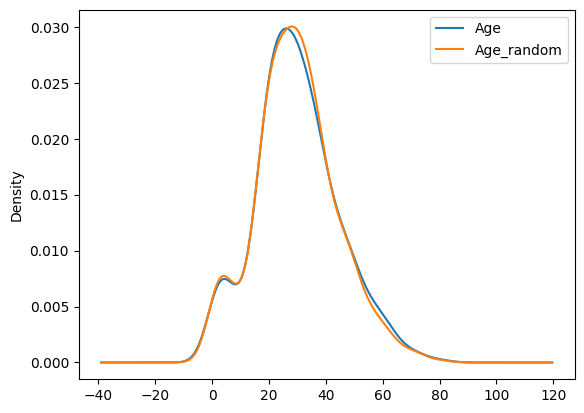

In [388]:
fig = plt.figure()
ax= plt.subplot()
X_train['Age'].plot(kind= 'kde',ax = ax)
X_train['Age_random'].plot(kind= 'kde',ax = ax)
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)

In [389]:
print(X_train['Age'].var())
print(X_train['Age_random'].var())
print(X_test['Age'].var())
print(X_test['Age_random'].var())

210.4528692463678
201.59945157649173
212.98912675266027
211.07122726256355


In [390]:
X_train['Age'] = X_train['Age_random'].copy()
X_test['Age'] = X_test['Age_random'].copy()
print(X_train['Age'].var())
X_test['Age'].var()

201.59945157649173


211.07122726256355

In [391]:
X_train.drop(['Age_random'],axis = 1 ,inplace=True)
X_test.drop(['Age_random'],axis = 1 ,inplace=True)

In [392]:
def diagnostic_plots(data, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(data[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt,)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = data[variable])
    plt.title('Boxplot')
    
    plt.show()

C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


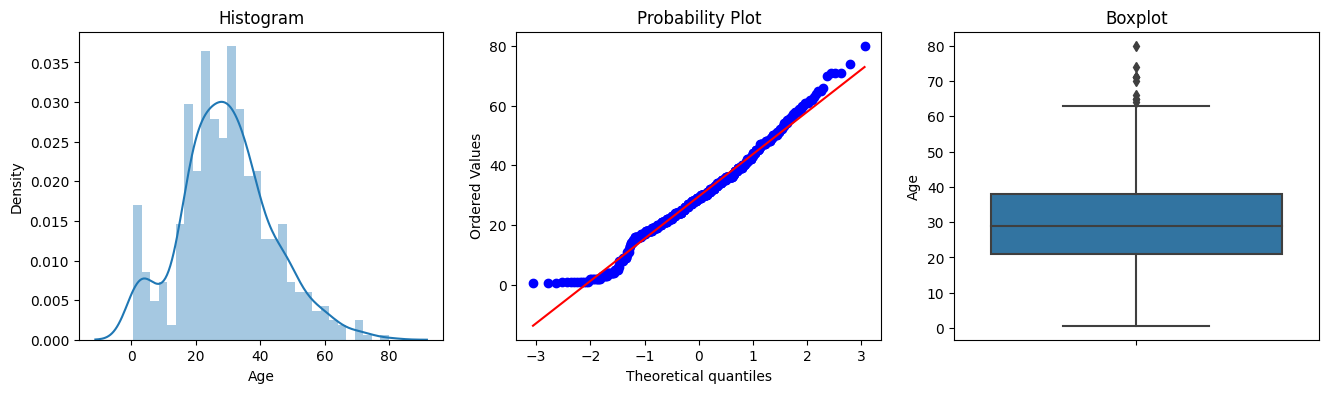

In [393]:
diagnostic_plots(X_train,'Age')

Age is quite normal distributed and there is alot of outliers

In [394]:
X_train['Age'] ,params= stats.boxcox(X_train['Age'])
print(params)

0.8072272236454323


C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


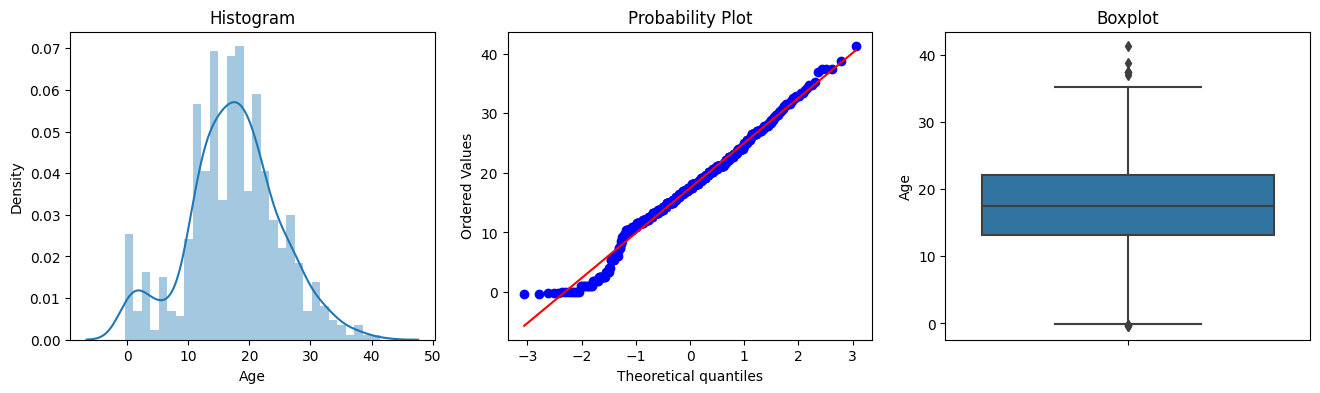

In [395]:
diagnostic_plots(X_train,'Age')

C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


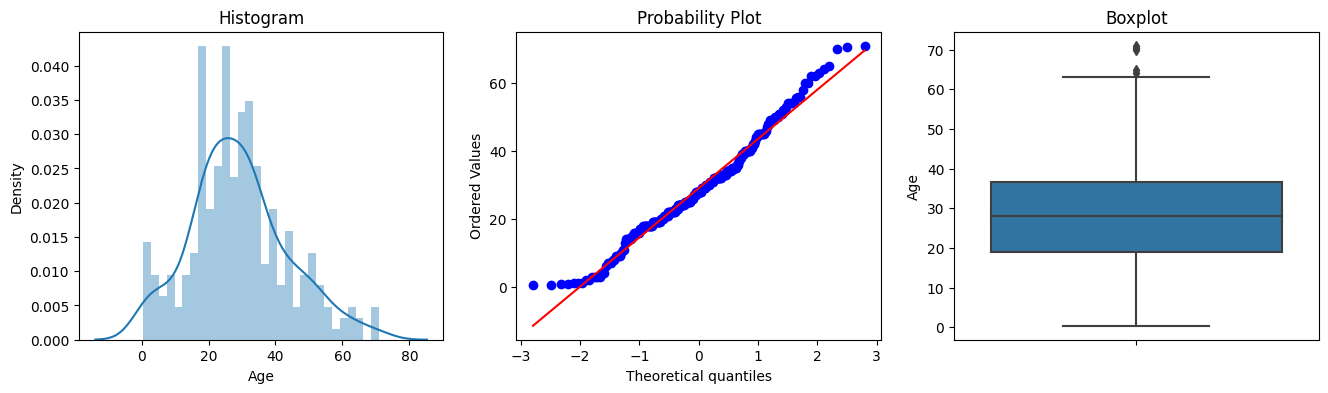

In [396]:
diagnostic_plots(X_test,'Age')

In [397]:
X_test['Age'],params = stats.boxcox(X_test['Age'])

C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


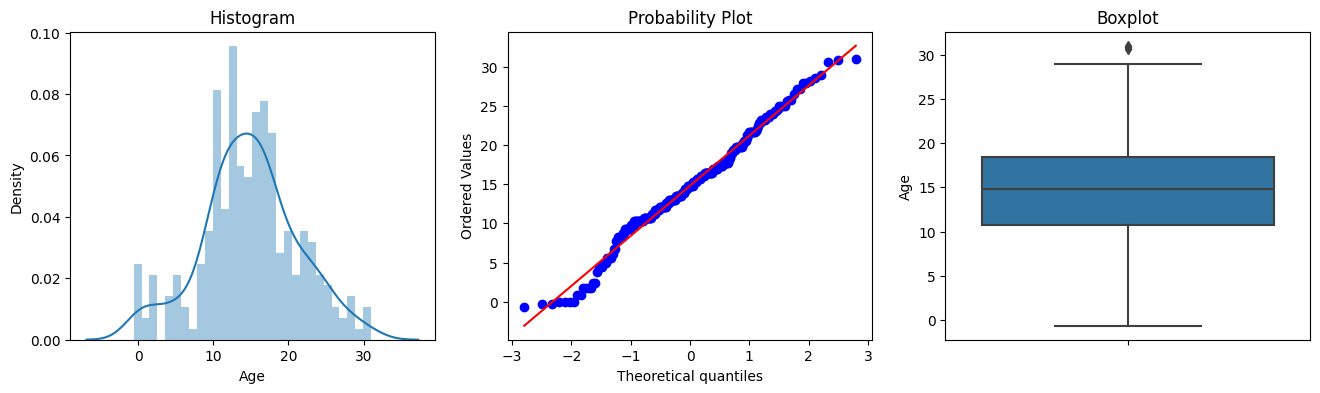

In [398]:
diagnostic_plots(X_test,'Age')

Age become better noramlly distributed

Text(0, 0.5, 'Survived percentage')

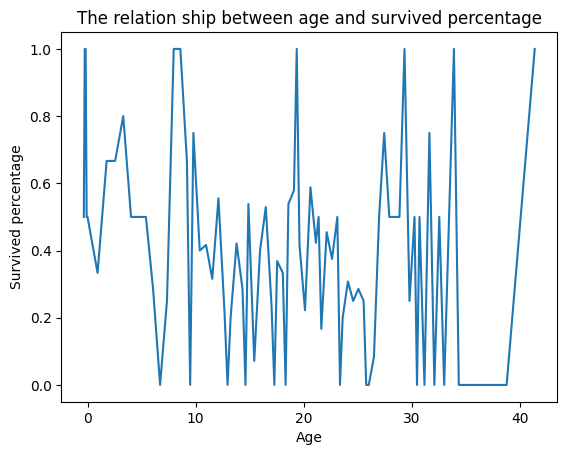

In [399]:
pd.concat([X_train['Age'],y_train],axis = 1).groupby('Age')['Survived'].mean().plot()
plt.title('The relation ship between age and survived percentage')
plt.ylabel('Survived percentage')

there is no relation ship between age and survived 

In [400]:
from feature_engine.discretisation import DecisionTreeDiscretiser
disc = DecisionTreeDiscretiser(variables=['Age','Fare'],
regression=False,cv = 10,
scoring='accuracy',
param_grid={'max_depth': [1, 2, 3],'min_samples_leaf':[10,4]})

disc.fit(X_train,y_train)
X_train =disc.transform(X_train)
X_test = disc.transform(X_test)


In [401]:
disc.binner_dict_['Age'].best_params_

{'max_depth': 1, 'min_samples_leaf': 10}

In [402]:
disc.scores_dict_['Age']

0.6243980738362761

Text(0, 0.5, 'Survived percentage')

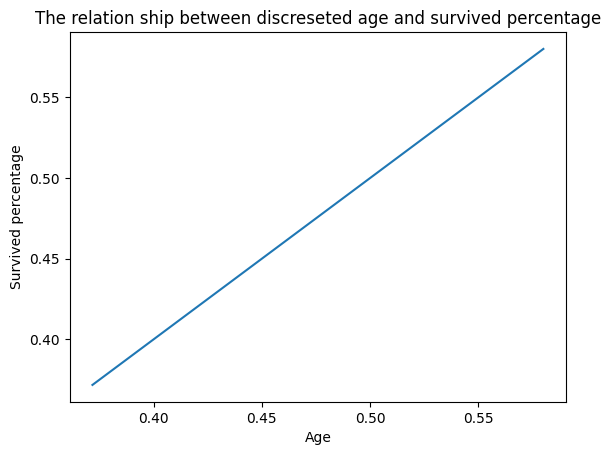

In [403]:
pd.concat([X_train['Age'],y_train],axis = 1).groupby('Age')['Survived'].mean().plot()
plt.title('The relation ship between discreseted age and survived percentage')
plt.ylabel('Survived percentage')

Text(0, 0.5, 'Survived')

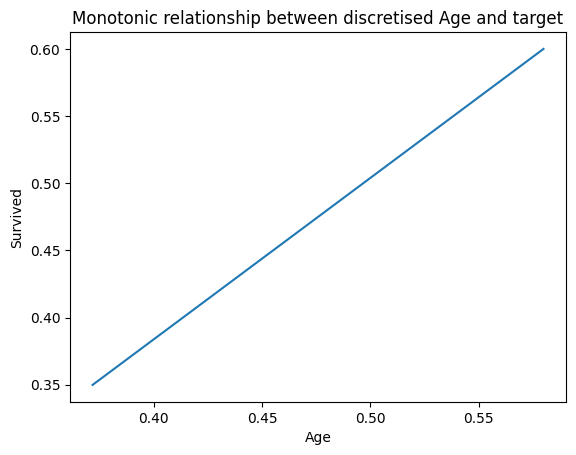

In [404]:
pd.concat([X_test['Age'], y_test], axis=1).groupby(['Age'])['Survived'].mean().plot()
plt.title('Monotonic relationship between discretised Age and target')
plt.ylabel('Survived')

C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


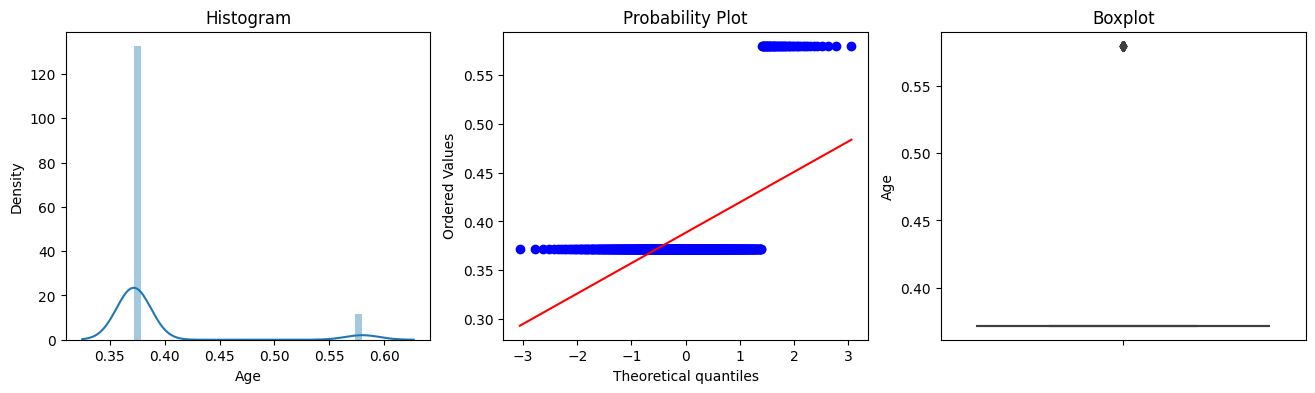

In [405]:
diagnostic_plots(X_train,'Age')

In [406]:
X_train.Age.value_counts()

0.371728    573
0.580000     50
Name: Age, dtype: int64

# End to the Age

In [407]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
857,1,male,0.371728,0.442308,S,Mr,1
52,1,female,0.371728,0.746269,C,Miss,0
386,3,male,0.580000,0.442308,S,Mr,0
124,1,male,0.371728,0.746269,S,Mr,0
578,3,female,0.371728,0.442308,C,Miss,0
...,...,...,...,...,...,...,...
835,1,female,0.371728,0.746269,C,Miss,0
192,3,female,0.371728,0.255319,S,Miss,0
629,3,male,0.371728,0.255319,Q,Mr,1
559,3,female,0.371728,0.442308,S,Miss,0


In [408]:
print(X_train['Pclass'].unique())
print(X_train['Pclass'].isna().mean())

[1 3 2]
0.0


In [409]:
pd.crosstab(index = X_train['Pclass'],columns = y_train)

Survived,0,1
Pclass,,
1,59,97
2,68,64
3,254,81


C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


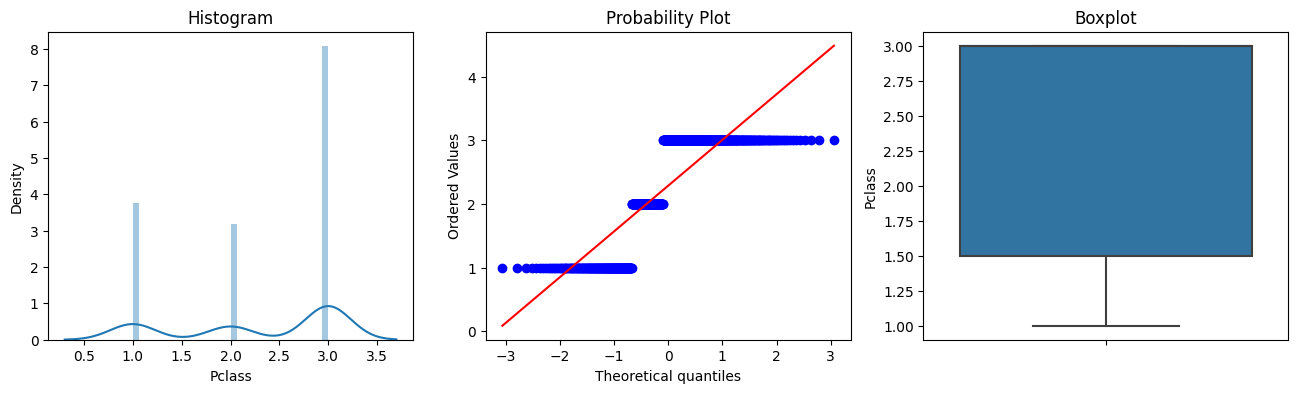

In [410]:
diagnostic_plots(X_train,'Pclass')

Pclass is very good for feature engineering

In [411]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
857,1,male,0.371728,0.442308,S,Mr,1
52,1,female,0.371728,0.746269,C,Miss,0
386,3,male,0.580000,0.442308,S,Mr,0
124,1,male,0.371728,0.746269,S,Mr,0
578,3,female,0.371728,0.442308,C,Miss,0
...,...,...,...,...,...,...,...
835,1,female,0.371728,0.746269,C,Miss,0
192,3,female,0.371728,0.255319,S,Miss,0
629,3,male,0.371728,0.255319,Q,Mr,1
559,3,female,0.371728,0.442308,S,Miss,0


Start of feature engineerig to sex

In [412]:
X_train['Sex'].isna().mean()

0.0

In [413]:
pd.crosstab(index =X_train['Sex'],columns=y_train)


Survived,0,1
Sex,,
female,53,162
male,328,80


In [414]:
X_train['Sex']=X_train['Sex'].map({'male':0,'female':1})
X_test['Sex']=X_test['Sex'].map({'male':0,'female':1})

In [415]:
pd.crosstab(index =X_train['Sex'],columns=y_train)
# end of the sex

Survived,0,1
Sex,,
0,328,80
1,53,162


Start of feature engineering to fare

C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


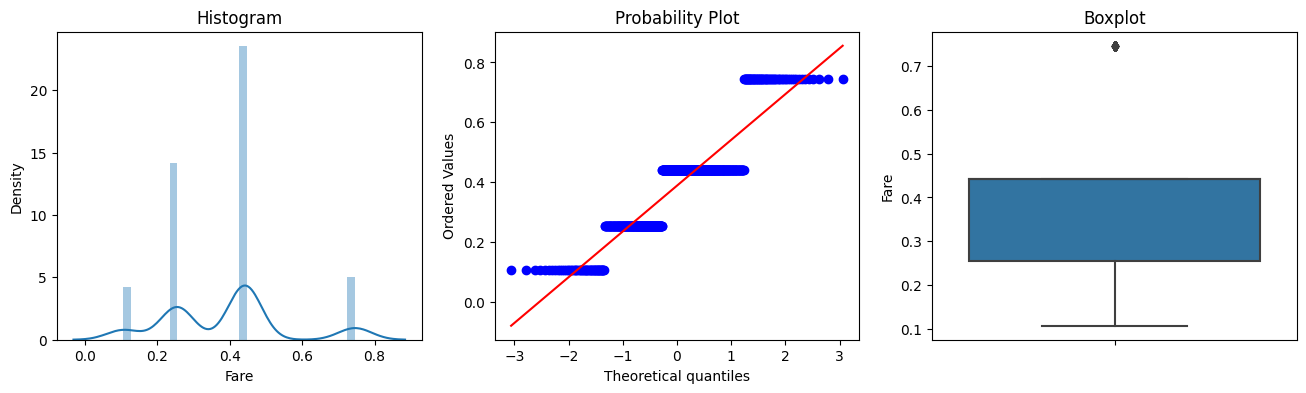

In [416]:
diagnostic_plots(X_train,'Fare')

In [417]:
X_train['Fare'], param = stats.yeojohnson(X_train['Fare']) 

C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


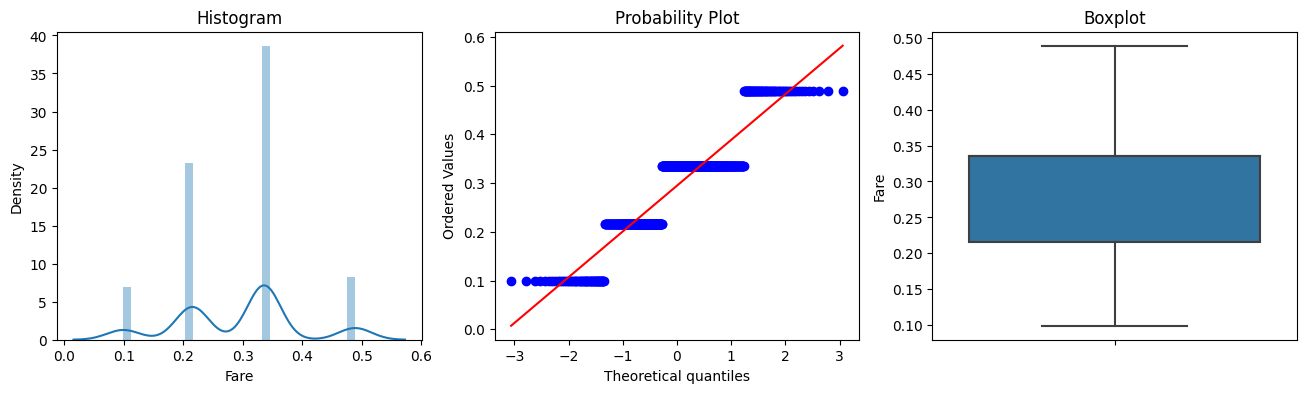

In [418]:
diagnostic_plots(X_train,'Fare')

fare become quite normal distributed

In [419]:
X_train.Fare.unique()

array([0.3357653 , 0.48892054, 0.21538231, 0.09932854])

Text(0, 0.5, 'Survived')

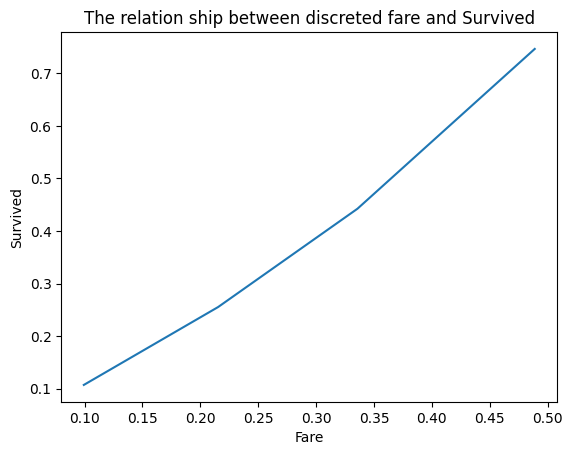

In [420]:
pd.concat([X_train['Fare'],y_train],axis = 1).groupby('Fare')['Survived'].mean().plot()
plt.title('The relation ship between discreted fare and Survived')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

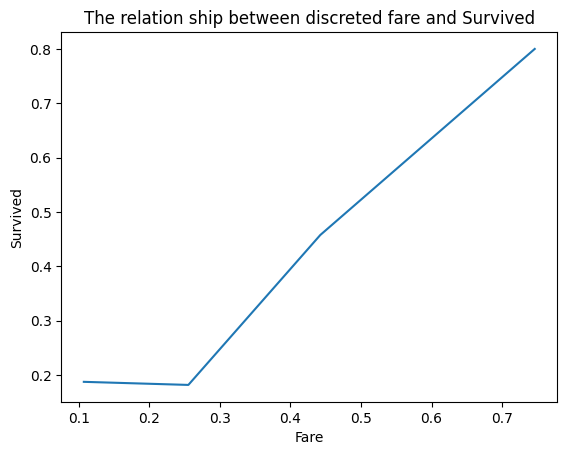

In [421]:
pd.concat([X_test['Fare'],y_test],axis = 1).groupby('Fare')['Survived'].mean().plot()
plt.title('The relation ship between discreted fare and Survived')
plt.ylabel('Survived')

C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


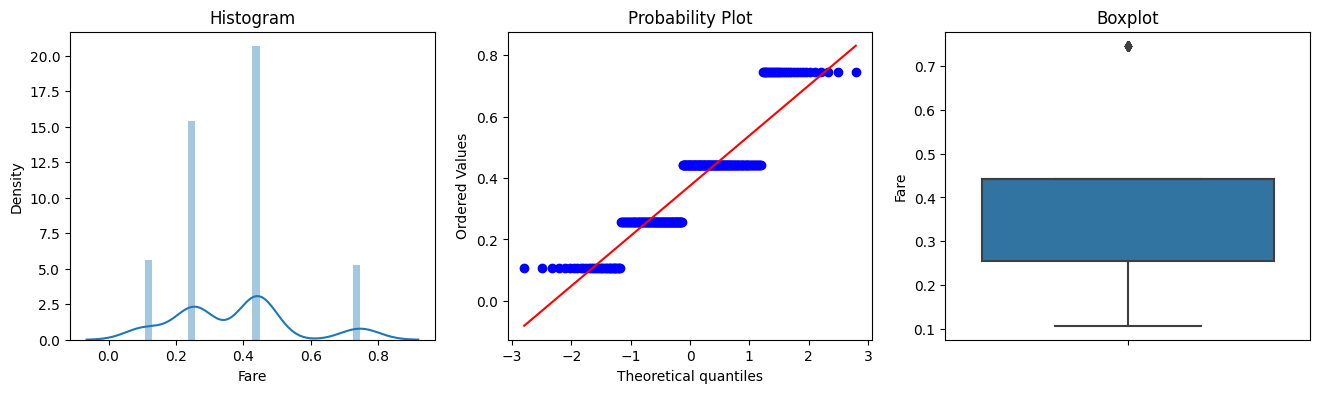

In [422]:
diagnostic_plots(X_test,'Fare')

Text(0, 0.5, 'Number of observations per bin')

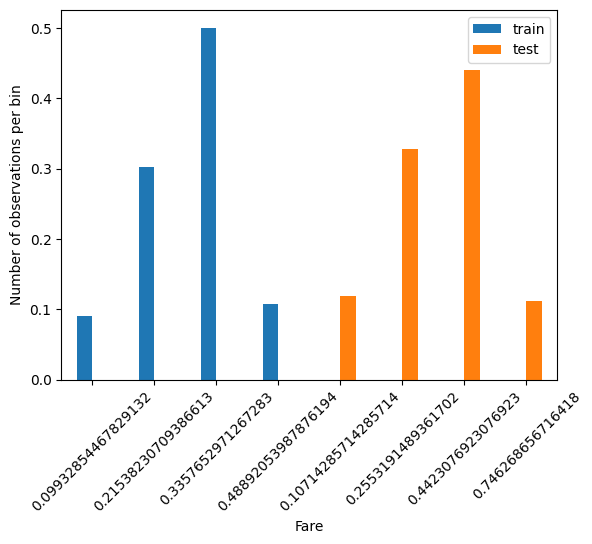

In [423]:
t1 = X_train.groupby(['Fare'])['Fare'].count() / len(X_train)
t2 = X_test.groupby(['Fare'])['Fare'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

End of Fare

In [424]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
857,1,0,0.371728,0.335765,S,Mr,1
52,1,1,0.371728,0.488921,C,Miss,0
386,3,0,0.580000,0.335765,S,Mr,0
124,1,0,0.371728,0.488921,S,Mr,0
578,3,1,0.371728,0.335765,C,Miss,0
...,...,...,...,...,...,...,...
835,1,1,0.371728,0.488921,C,Miss,0
192,3,1,0.371728,0.215382,S,Miss,0
629,3,0,0.371728,0.215382,Q,Mr,1
559,3,1,0.371728,0.335765,S,Miss,0


In [425]:
X_train['Embarked'].isna().mean()

0.0032102728731942215

In [426]:
X_train['Embarked'].value_counts()

S    457
C    108
Q     56
Name: Embarked, dtype: int64

In [427]:
X_train['imputed_Embarked'] = X_train['Embarked'].fillna('S')
X_test['imputed_Embarked'] = X_test['Embarked'].fillna('S')


In [428]:
X_train['Embarked'].isna().mean()

0.0032102728731942215

In [429]:
X_train['imputed_Embarked'].isna().mean()

0.0

In [430]:
X_train['Embarked'] = X_train['Embarked'].map({'S':1,'C':2,'Q':3})
X_test['Embarked'] = X_test['Embarked'].map({'S':1,'C':2,'Q':3})

In [431]:
X_train['imputed_Embarked'] = X_train['imputed_Embarked'].map({'S':1,'C':2,'Q':3})
X_test['imputed_Embarked'] = X_test['imputed_Embarked'].map({'S':1,'C':2,'Q':3})

In [432]:
X_train['Embarked'].var()

0.40977611552646614

In [433]:
X_train['imputed_Embarked'].var()

0.40886076602684857

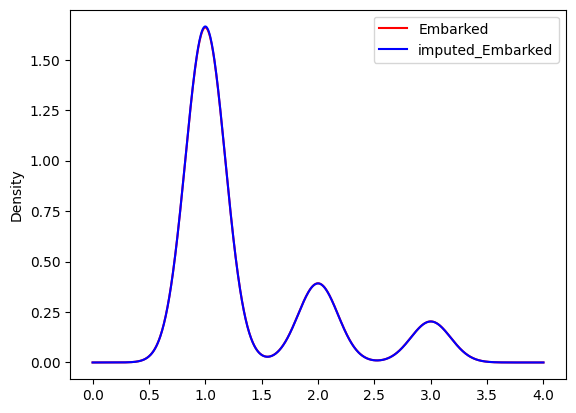

In [434]:
fig = plt.figure()
ax = plt.subplot()
X_train['Embarked'].plot(kind='kde',ax = ax , color = 'red')
X_train['imputed_Embarked'].plot(kind='kde',ax = ax ,color= 'blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels)

In [435]:
X_train['Embarked']=X_train['imputed_Embarked'].copy()
X_test['Embarked']=X_test['imputed_Embarked'].copy()
X_train['Embarked'].var()

0.40886076602684857

In [436]:
X_train.drop('imputed_Embarked',axis = 1 ,inplace =True)
X_test.drop('imputed_Embarked',axis = 1 ,inplace =True)
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
857,1,0,0.371728,0.335765,1,Mr,1
52,1,1,0.371728,0.488921,2,Miss,0
386,3,0,0.580000,0.335765,1,Mr,0
124,1,0,0.371728,0.488921,1,Mr,0
578,3,1,0.371728,0.335765,2,Miss,0
...,...,...,...,...,...,...,...
835,1,1,0.371728,0.488921,2,Miss,0
192,3,1,0.371728,0.215382,1,Miss,0
629,3,0,0.371728,0.215382,3,Mr,1
559,3,1,0.371728,0.335765,1,Miss,0


In [437]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
495,3,0,0.371728,0.442308,2,Mr,1
648,3,0,0.371728,0.255319,1,Mr,1
278,3,0,0.580000,0.442308,3,Mr,0
31,1,1,0.371728,0.746269,2,Miss,0
255,3,1,0.371728,0.442308,2,Miss,0
...,...,...,...,...,...,...,...
263,1,0,0.371728,0.107143,1,Mr,1
718,3,0,0.371728,0.442308,3,Mr,1
620,3,0,0.371728,0.442308,2,Mr,0
786,3,1,0.371728,0.107143,1,Miss,1


C:\Users\7fno\AppData\Local\Temp\ipykernel_11980\1629806337.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=30)


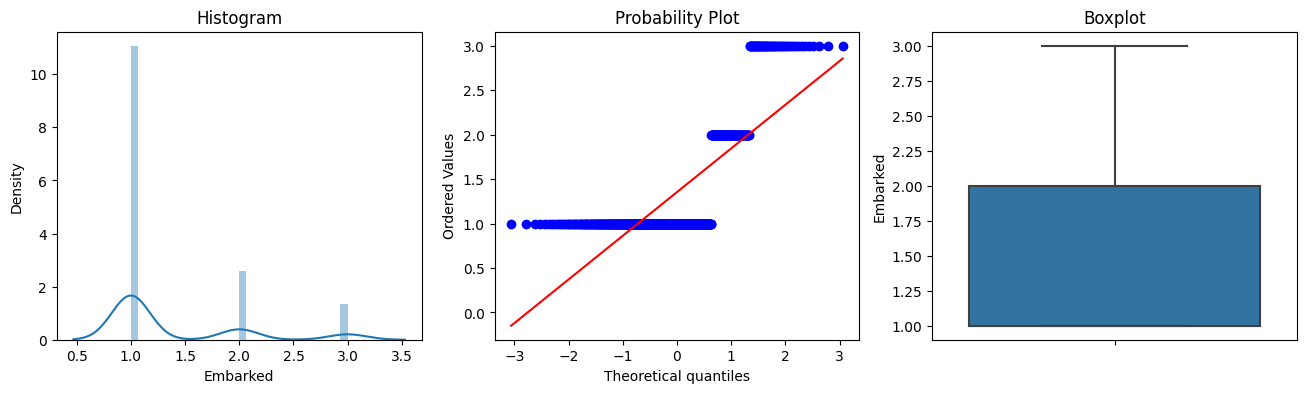

In [438]:
diagnostic_plots(X_train,'Embarked')

In [439]:
X_train['Title'] = X_train['Title'].map({'Mr':0,'Miss':1,'Rare':2})
X_test['Title'] = X_test['Title'].map({'Mr':0,'Miss':1,'Rare':2})

In [440]:
X_train.Title.unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot: >

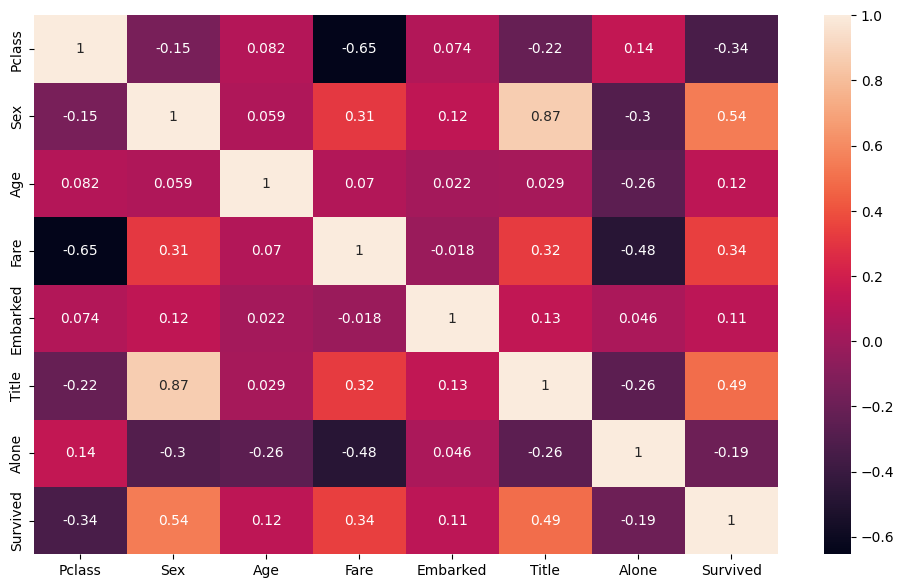

In [441]:
fig = plt.figure(figsize=(12,7))
corr =pd.concat([X_train,y_train],axis = 1) 
cormat = corr.corr()
sns.heatmap(cormat,annot =  True)

In [442]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,Alone
495,3,0,0.371728,0.442308,2,0,1
648,3,0,0.371728,0.255319,1,0,1
278,3,0,0.580000,0.442308,3,0,0
31,1,1,0.371728,0.746269,2,1,0
255,3,1,0.371728,0.442308,2,1,0
...,...,...,...,...,...,...,...
263,1,0,0.371728,0.107143,1,0,1
718,3,0,0.371728,0.442308,3,0,1
620,3,0,0.371728,0.442308,2,0,0
786,3,1,0.371728,0.107143,1,1,1


# choosing the best model for classification

In [443]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [444]:
X_train=pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6
0,0.779631,-0.765375,-0.320750,0.384668,0.988726,-0.780208,0.821584
1,0.779631,-0.765375,-0.320750,-0.682624,-0.607530,-0.780208,0.821584
2,0.779631,-0.765375,3.117691,0.384668,2.584982,-0.780208,-1.217161
3,-1.649916,1.306549,-0.320750,2.119615,0.988726,0.962257,-1.217161
4,0.779631,1.306549,-0.320750,0.384668,0.988726,0.962257,-1.217161
...,...,...,...,...,...,...,...
263,-1.649916,-0.765375,-0.320750,-1.528384,-0.607530,-0.780208,0.821584
264,0.779631,-0.765375,-0.320750,0.384668,2.584982,-0.780208,0.821584
265,0.779631,-0.765375,-0.320750,0.384668,0.988726,-0.780208,-1.217161
266,0.779631,1.306549,-0.320750,-1.528384,-0.607530,0.962257,0.821584


In [445]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
logistic = LogisticRegression(n_jobs=-1,solver='liblinear',penalty='l1',random_state=42)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

log_score = accuracy_score(y_pred,y_test)
log_score


c:\Users\7fno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


0.7873134328358209

In [446]:
pd.DataFrame(confusion_matrix(y_test,y_pred),
            columns=["Predicted Not-Survived", "Predicted Survived"],
            index=["Not-Survived","Survived"] )


,Predicted Not-Survived,Predicted Survived
Not-Survived,139,29
Survived,28,72


In [447]:
acc = accuracy_score(y_test,y_pred)
print(acc)
rec = recall_score(y_test,y_pred)
print(rec)
pre = precision_score(y_test , y_pred)
print(pre)

0.7873134328358209
0.72
0.7128712871287128


In [448]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.71      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



0.8663392857142858


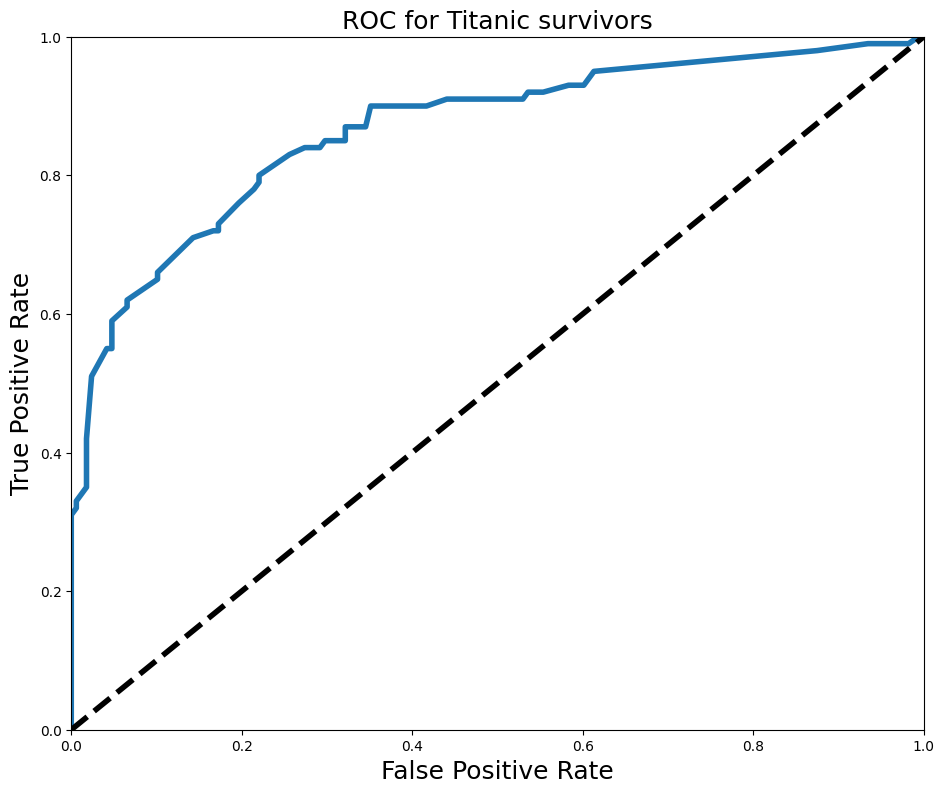

In [449]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logistic.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

0.8378361151506278


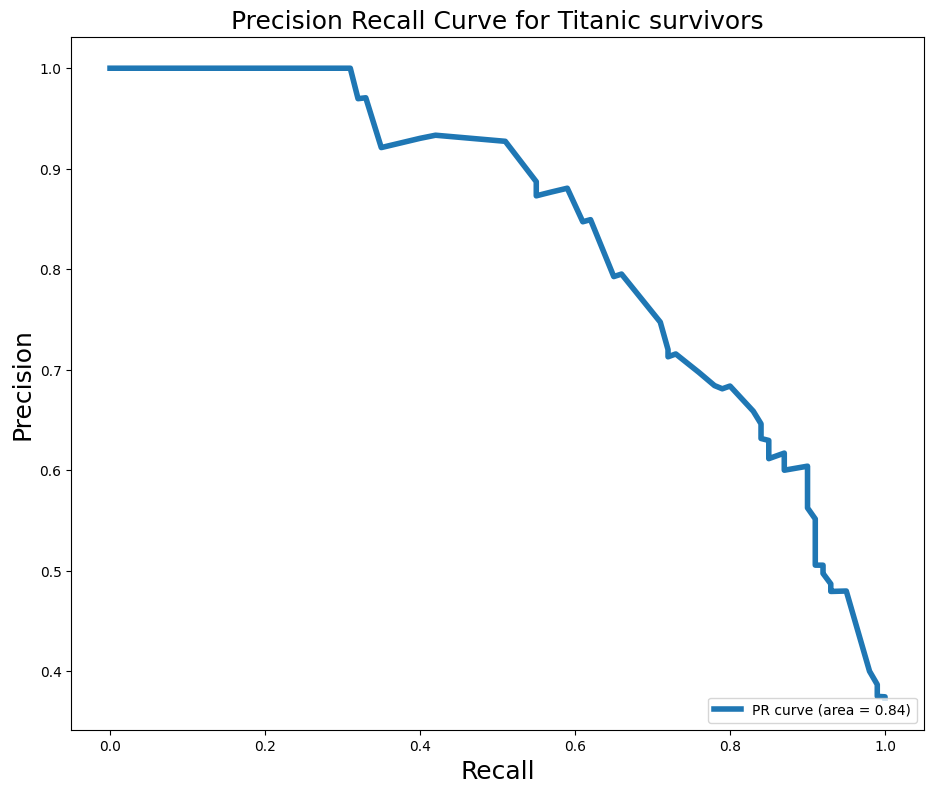

In [450]:
from sklearn.metrics import precision_recall_curve,roc_auc_score,accuracy_score

y_score = logistic.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)
print(PR_AUC)
plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [451]:
c_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
penalities = ['l1','l2']
tol = [.0001,.5,1,2,3]
params = {'C':c_vals ,'penalty':penalities ,'tol' :tol}

logistic = LogisticRegression(solver = 'liblinear',C =14,penalty='l1',tol = .5)#,penalty ='l2',C = 6 )

logistic.fit(X_train,y_train)
y_pred =logistic.predict(X_test)


In [452]:
roc  = accuracy_score(y_test,y_pred)
roc

0.7761194029850746

In [453]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)


tree.fit(X_train,y_train)
y_pred =tree.predict(X_test)
acc = accuracy_score(y_pred,y_test)

acc

0.8171641791044776

In [454]:
train.shape

(891, 8)

In [455]:
y_pred.shape

(268,)

In [456]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
ada = AdaBoostClassifier(algorithm='SAMME', learning_rate=1)
# parameter = {'algorithm':['SAMME','SAMME.R'],'n_estimators':[50,60,70,80,90],
#             'learning_rate':[1,2,3,4,5]   }
# grid_ada = GridSearchCV(estimator= ada,param_grid= parameter,cv = 5,n_jobs = -1 )

# grid_ada.fit(X_train,y_train)

# grid_ada.best_estimator_
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
acc =accuracy_score(y_test,y_pred)


In [457]:
acc

0.7798507462686567

In [458]:
extra = ExtraTreesClassifier(max_depth=20, min_samples_split=13, n_estimators=10)
# param = {'n_estimators':[10,15,20,25,30,35,40],
# 'criterion':['gini','entropy'],
# 'max_depth':[10,15,20,25,30,35,40] ,'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12,13]}

# grid_extra= GridSearchCV(estimator = extra,cv = 5 ,param_grid=param,n_jobs = -1)
# grid_extra.fit(X_train,y_train)
extra.fit(X_train,y_train)
y_pred = extra.predict(X_test)
acc = accuracy_score(y_pred,y_test)
acc



0.8171641791044776

In [459]:
np.mean(cross_val_score(extra,X_train,y_train,cv = 5))



0.8009032258064517

In [464]:
submission = pd.read_csv('C:/Users/7fno/Desktop/Titanic classification/gender_submission.csv')

In [465]:
predictions = extra.predict(X_test)
submission['Survived'] = pd.Series(predictions)


In [466]:
submission = submission.fillna(0)
submission.to_csv('C:/Users/7fno/Desktop/Titanic classification/gender_submission.csv', index=False)

In [ ]:
# def impute_na(data, variable):

#     df = data.copy()

#     # random sampling
#     df[variable + '_random'] = df[variable]

#     # extract the random sample to fill the na
#     random_sample = X_train[variable].dropna().sample(
#         df[variable].isnull().sum(), random_state=0)

#     # pandas needs to have the same index in order to merge datasets
#     random_sample.index = df[df[variable].isnull()].index
#     df.loc[df[variable].isnull(), variable + '_random'] = random_sample

#     return df[variable + '_random']